In [1]:
import numpy as np
import random
# import trimesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import sys
import os
from scipy import stats
from math import sqrt
np.set_printoptions(threshold=sys.maxsize)


Objective -2773.8460399999994  Average Standard Deviation 47.055188190965424
Volume 722.9536666666668  Average Standard Deviation 11.786119090787352
Volume TSA 669.8389999999999  Average Standard Deviation 15.897775389447842
Area 107.21573333333332  Average Standard Deviation 6.824379512372453
Area TSA 107.27416666666664  Average Standard Deviation 5.768629571994452
Stress 0.3606  Average Standard Deviation 0.006146001410131095
Stress TSA 0.36469999999999997  Average Standard Deviation 0.008210359310042412
Displacement 24.015533333333334  Average Standard Deviation 1.3475411121330916
Displacement TSA 26.315366666666666  Average Standard Deviation 1.3102537790655504


C:\Users\Lisha White\AppData\Local\Temp\ipykernel_10192\2415430418.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_R = np.array(Full_R)
C:\Users\Lisha White\AppData\Local\Temp\ipykernel_10192\2415430418.py:66: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_V = np.array(Full_V)
C:\Users\Lisha White\AppData\Local\Temp\ipykernel_10192\2415430418.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

(0.0, 1400.0)

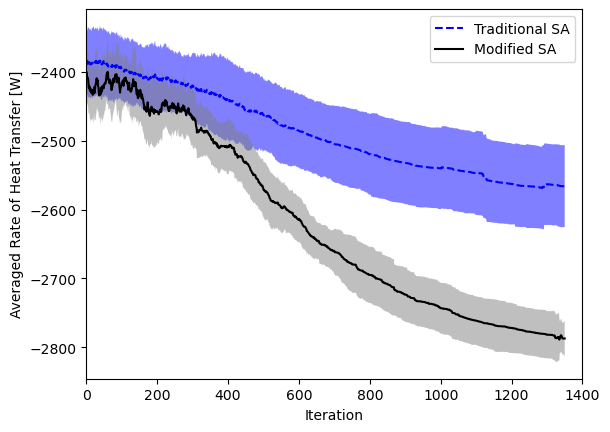

In [21]:
## Cantilever ##

Full_R_TSA = []
Full_V_TSA= [] #volume
Full_A_TSA = [] #area
Full_S_TSA = [] #area
Full_D_TSA = [] #displacement
Full_R = []
Full_V= [] #volume
Full_A = [] #area
Full_S = [] #area
Full_D = [] #displacement
start = 0
end = 30
path = os.getcwd()+'Conf'
for j in range(start,end):
    path = os.getcwd()
    
    P = path+'\\Conf in %i'%j+'.txt'
#     print(P)
    if os.path.isfile(P):
#         print(j)
        data_R = np.loadtxt(path+'\Conf in %i'%j+'.txt',usecols=0)
        data_V = np.loadtxt(path+'\Conf in %i'%j+'.txt',usecols=1)
        data_A = np.loadtxt(path+'\Conf in %i'%j+'.txt',usecols=2)
        data_S = np.loadtxt(path+'\Conf in %i'%j+'.txt',usecols=3)
        data_D = np.loadtxt(path+'\Conf in %i'%j+'.txt',usecols=4)
        Full_R.append(data_R)
        Full_V.append(data_V)
        Full_A.append(data_A)
        Full_S.append(data_S)
        Full_D.append(data_D)
for j in range(start,end):
    path = os.getcwd()
    
    P = path+'\\Conf TSA in %i'%j+'.txt'
#     print(P)
    if os.path.isfile(P):
#         print(j)
        data_R = np.loadtxt(path+'\Conf TSA in %i'%j+'.txt',usecols=0)
        data_V = np.loadtxt(path+'\Conf TSA in %i'%j+'.txt',usecols=1)
        data_A = np.loadtxt(path+'\Conf TSA in %i'%j+'.txt',usecols=2)
        data_S = np.loadtxt(path+'\Conf TSA in %i'%j+'.txt',usecols=3)
        data_D = np.loadtxt(path+'\Conf TSA in %i'%j+'.txt',usecols=4)
        Full_R_TSA.append(data_R)
        Full_V_TSA.append(data_V)
        Full_A_TSA.append(data_A)
        Full_S_TSA.append(data_S)
        Full_D_TSA.append(data_D)
def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    var = arr.var(axis=-1)
    return arr.mean(axis = -1), arr.std(axis=-1),sqrt(var[-1])

T = 50
n = 150
limit = n/2
alpha = 0.5
figure1 = pyplot.figure()
y, error,std = tolerant_mean(Full_R)
yTSA, errorTSA,stdTSA = tolerant_mean(Full_R_TSA)

F_R = np.array(Full_R)
F_V = np.array(Full_V)
F_A = np.array(Full_A)
F_S = np.array(Full_S)
F_D = np.array(Full_D)

F_R_TSA = np.array(Full_R_TSA)
F_V_TSA = np.array(Full_V_TSA)
F_A_TSA = np.array(Full_A_TSA)
F_S_TSA = np.array(Full_S_TSA)
F_D_TSA = np.array(Full_D_TSA)
obj = []
vol = []
are = []
Str = []
dis = []

obj_TSA = []
vol_TSA = []
are_TSA = []
Str_TSA = []
dis_TSA = []
for i in range(len(F_R)):
    O = F_R[i][-1]
    V = F_V[i][-1]
    A = F_A[i][-1]
    S = F_S[i][-1]
    D = F_D[i][-1]
    obj.append(O)
    vol.append(V)
    are.append(A)
    Str.append(S)
    dis.append(D)
M_obj = np.mean(obj)
S_obj = sqrt(np.var(obj))
M_vol = np.mean(vol)
S_vol = sqrt(np.var(vol))
M_are = np.mean(are)
S_are = sqrt(np.var(are))
M_str = np.mean(Str)
S_str = sqrt(np.var(Str))
M_dis = np.mean(dis)
S_dis = sqrt(np.var(dis))

for i in range(len(F_R_TSA)):
    O = F_R_TSA[i][-1]
    V = F_V_TSA[i][-1]
    A = F_A_TSA[i][-1]
    S = F_S_TSA[i][-1]
    D = F_D_TSA[i][-1]
    obj_TSA.append(O)
    vol_TSA.append(V)
    are_TSA.append(A)
    Str_TSA.append(S)
    dis_TSA.append(D)
M_obj_TSA = np.mean(obj_TSA)
S_obj_TSA = sqrt(np.var(obj_TSA))
M_vol_TSA = np.mean(vol_TSA)
S_vol_TSA = sqrt(np.var(vol_TSA))
M_are_TSA = np.mean(are_TSA)
S_are_TSA = sqrt(np.var(are_TSA))
M_str_TSA = np.mean(Str_TSA)
S_str_TSA = sqrt(np.var(Str_TSA))
M_dis_TSA = np.mean(dis_TSA)
S_dis_TSA = sqrt(np.var(dis_TSA))


print('Objective',M_obj,' Average Standard Deviation',S_obj)

pyplot.plot(np.arange(1350)+1, yTSA[:1350], "b--",label = 'Traditional SA')
pyplot.fill_between(np.arange(1350)+1, yTSA[:1350]-errorTSA[:1350], yTSA[:1350]+errorTSA[:1350],
    alpha=0.5, edgecolor='none', facecolor='blue')

pyplot.plot(np.arange(len(y))+1, y, "k-",label = 'Modified SA')
pyplot.fill_between(np.arange(len(y))+1, y-error, y+error,
    alpha=0.5, edgecolor='none', facecolor='0.5')

pyplot.legend(fontsize = 'medium',markerscale = 1)

pyplot.xlabel('Iteration')
# pyplot.ylabel('Averaged Objective Function')
pyplot.ylabel("Averaged Rate of Heat Transfer [W]")
# pyplot.title('Temp: %i' %T + ' Alpha: %s' %alpha) #+' Mutations: %i' %n+' Limit: %s' %limit)


y, error,std = tolerant_mean(Full_V)
print('Volume',M_vol,' Average Standard Deviation',S_vol)
print('Volume TSA',M_vol_TSA,' Average Standard Deviation',S_vol_TSA)

y, error,std = tolerant_mean(Full_A)
print('Area',M_are,' Average Standard Deviation',S_are)
print('Area TSA',M_are_TSA,' Average Standard Deviation',S_are_TSA)

y, error,std = tolerant_mean(Full_S)
print('Stress',M_str,' Average Standard Deviation',S_str)
print('Stress TSA',M_str_TSA,' Average Standard Deviation',S_str_TSA)

y, error,std = tolerant_mean(Full_D)
print('Displacement',M_dis,' Average Standard Deviation',S_dis)
print('Displacement TSA',M_dis_TSA,' Average Standard Deviation',S_dis_TSA)

pyplot.xlim([0,1400])


Objective -5041.362352666668  Average Standard Deviation 31.87194690865531
Volume 5505.977000000001  Average Standard Deviation 19.61487754231465
Volume TSA 5113.651379310345  Average Standard Deviation 268.6049274681431
Area 1248.9447  Average Standard Deviation 17.97968194592625
Area TSA 1214.4944482758617  Average Standard Deviation 30.88252970095038
Stress 0.6418999999999999  Average Standard Deviation 0.00529370695574787
Stress TSA 0.6457241379310346  Average Standard Deviation 0.017948002581642062
Displacement 68.84096666666666  Average Standard Deviation 4.647967731409312
Displacement TSA 77.94172413793105  Average Standard Deviation 7.913620457886917


C:\Users\Lisha White\AppData\Local\Temp\ipykernel_1556\388778851.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_R = np.array(Full_R)
C:\Users\Lisha White\AppData\Local\Temp\ipykernel_1556\388778851.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_V = np.array(Full_V)
C:\Users\Lisha White\AppData\Local\Temp\ipykernel_1556\388778851.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

(0.0, 1400.0)

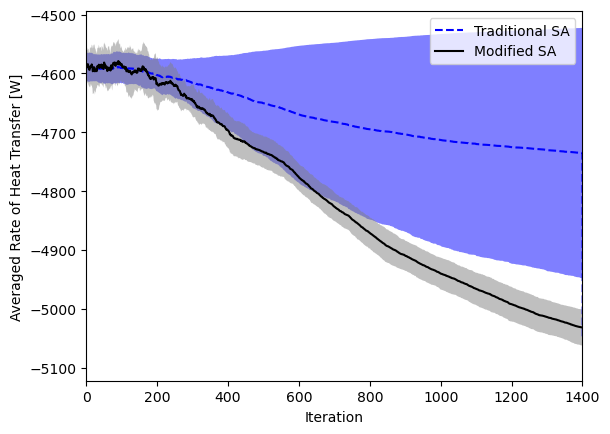

In [20]:
## Bracket ##


Full_R_TSA = []
Full_V_TSA= [] #volume
Full_A_TSA = [] #area
Full_S_TSA = [] #area
Full_D_TSA = [] #displacement
Full_R = []
Full_V= [] #volume
Full_A = [] #area
Full_S = [] #area
Full_D = [] #displacement
start = 0
end = 30
path = os.getcwd()+'Conf'
for j in range(start,end):
    path = os.getcwd()
    
    P = path+'\\1400_%i'%j+'.txt'
#     print(P)
    if os.path.isfile(P):
#         print('In')
        data_R = np.loadtxt(path+'\\1400_%i'%j+'.txt',usecols=0)
        data_V = np.loadtxt(path+'\\1400_%i'%j+'.txt',usecols=1)
        data_A = np.loadtxt(path+'\\1400_%i'%j+'.txt',usecols=2)
        data_S = np.loadtxt(path+'\\1400_%i'%j+'.txt',usecols=3)
        data_D = np.loadtxt(path+'\\1400_%i'%j+'.txt',usecols=4)
        Full_R.append(data_R)
        Full_V.append(data_V)
        Full_A.append(data_A)
        Full_S.append(data_S)
        Full_D.append(data_D)
for j in range(start,end):
    path = os.getcwd()
    
    P = path+'\\1400TSA_%i'%j+'.txt'
#     print(P)
    if os.path.isfile(P):
        data_R = np.loadtxt(path+'\\1400TSA_%i'%j+'.txt',usecols=0)
        data_V = np.loadtxt(path+'\\1400TSA_%i'%j+'.txt',usecols=1)
        data_A = np.loadtxt(path+'\\1400TSA_%i'%j+'.txt',usecols=2)
        data_S = np.loadtxt(path+'\\1400TSA_%i'%j+'.txt',usecols=3)
        data_D = np.loadtxt(path+'\\1400TSA_%i'%j+'.txt',usecols=4)
        res = 1400-len(data_R)
        if res > 0:
            last = np.repeat(data_R[-1],repeats = res)
            data_R = np.append(data_R,last)
        Full_R_TSA.append(data_R)
        Full_V_TSA.append(data_V)
        Full_A_TSA.append(data_A)
        Full_S_TSA.append(data_S)
        Full_D_TSA.append(data_D)
def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    var = arr.var(axis=-1)
    return arr.mean(axis = -1), arr.std(axis=-1),sqrt(var[-1])

T = 50
n = 150
limit = n/2
alpha = 0.5
figure1 = pyplot.figure()
y, error,std = tolerant_mean(Full_R)
yTSA, errorTSA,stdTSA = tolerant_mean(Full_R_TSA)

F_R = np.array(Full_R)
F_V = np.array(Full_V)
F_A = np.array(Full_A)
F_S = np.array(Full_S)
F_D = np.array(Full_D)

F_R_TSA = np.array(Full_R_TSA)
F_V_TSA = np.array(Full_V_TSA)
F_A_TSA = np.array(Full_A_TSA)
F_S_TSA = np.array(Full_S_TSA)
F_D_TSA = np.array(Full_D_TSA)
obj = []
vol = []
are = []
Str = []
dis = []

obj_TSA = []
vol_TSA = []
are_TSA = []
Str_TSA = []
dis_TSA = []
for i in range(len(F_R)):
    O = F_R[i][-1]
    V = F_V[i][-1]
    A = F_A[i][-1]
    S = F_S[i][-1]
    D = F_D[i][-1]
    obj.append(O)
    vol.append(V)
    are.append(A)
    Str.append(S)
    dis.append(D)
M_obj = np.mean(obj)
S_obj = sqrt(np.var(obj))
M_vol = np.mean(vol)
S_vol = sqrt(np.var(vol))
M_are = np.mean(are)
S_are = sqrt(np.var(are))
M_str = np.mean(Str)
S_str = sqrt(np.var(Str))
M_dis = np.mean(dis)
S_dis = sqrt(np.var(dis))

for i in range(len(F_R_TSA)):
    O = F_R_TSA[i][-1]
    V = F_V_TSA[i][-1]
    A = F_A_TSA[i][-1]
    S = F_S_TSA[i][-1]
    D = F_D_TSA[i][-1]
    obj_TSA.append(O)
    vol_TSA.append(V)
    are_TSA.append(A)
    Str_TSA.append(S)
    dis_TSA.append(D)
M_obj_TSA = np.mean(obj_TSA)
S_obj_TSA = sqrt(np.var(obj_TSA))
M_vol_TSA = np.mean(vol_TSA)
S_vol_TSA = sqrt(np.var(vol_TSA))
M_are_TSA = np.mean(are_TSA)
S_are_TSA = sqrt(np.var(are_TSA))
M_str_TSA = np.mean(Str_TSA)
S_str_TSA = sqrt(np.var(Str_TSA))
M_dis_TSA = np.mean(dis_TSA)
S_dis_TSA = sqrt(np.var(dis_TSA))


print('Objective',M_obj,' Average Standard Deviation',S_obj)

pyplot.plot(np.arange(len(yTSA))+1, yTSA, "b--",label = 'Traditional SA')
pyplot.fill_between(np.arange(len(yTSA))+1, yTSA-errorTSA, yTSA+errorTSA,
    alpha=0.5, edgecolor='none', facecolor='blue')

pyplot.plot(np.arange(len(y))+1, y, "k-",label = 'Modified SA')
pyplot.fill_between(np.arange(len(y))+1, y-error, y+error,
    alpha=0.5, edgecolor='none', facecolor='0.5')

pyplot.legend(fontsize = 'medium',markerscale = 1)

pyplot.xlabel('Iteration')
# pyplot.ylabel('Averaged Objective Function')
pyplot.ylabel("Averaged Rate of Heat Transfer [W]")
# pyplot.title('Temp: %i' %T + ' Alpha: %s' %alpha) #+' Mutations: %i' %n+' Limit: %s' %limit)


y, error,std = tolerant_mean(Full_V)
print('Volume',M_vol,' Average Standard Deviation',S_vol)
print('Volume TSA',M_vol_TSA,' Average Standard Deviation',S_vol_TSA)

y, error,std = tolerant_mean(Full_A)
print('Area',M_are,' Average Standard Deviation',S_are)
print('Area TSA',M_are_TSA,' Average Standard Deviation',S_are_TSA)

y, error,std = tolerant_mean(Full_S)
print('Stress',M_str,' Average Standard Deviation',S_str)
print('Stress TSA',M_str_TSA,' Average Standard Deviation',S_str_TSA)

y, error,std = tolerant_mean(Full_D)
print('Displacement',M_dis,' Average Standard Deviation',S_dis)
print('Displacement TSA',M_dis_TSA,' Average Standard Deviation',S_dis_TSA)

pyplot.xlim([0,1400])


In [19]:
## Convergence Tolerance ##
for i in range(len(F_R)):
    O = 100*(abs(F_R[i][-1])-abs(F_R[i][-2]))/F_R[i][-2]
    O2 = 100*(abs(F_R[i][-2])-abs(F_R[i][-3]))/F_R[i][-3]
    print(O,O2)

-0.0 -0.0
0.0003553114094369427 -0.0
-0.0 -0.0
-0.0 -0.0017121795614778188
-0.0 -0.010654428278092766
-0.0 -0.0
-0.07906170063935965 -0.0
-0.0 -0.0
-0.0 -0.0
-0.0 -0.0
-0.0 -0.0
-0.008797987018033075 -0.0
-0.0 -0.0
-0.0 -0.0
-0.006356259652368954 -0.08686452405067782
-0.0 -0.0
-0.0 -0.06668383975878364
-0.0 -0.0
-0.009244579105585493 -0.0
-0.0 -0.011696793685990293
-0.05185440627360612 -0.025932871744152323
-0.009907454882019955 -0.0
-0.0 -0.0
-0.0 -0.0
-0.0 -0.009162513444672714
-0.0 -0.0
-0.0 -0.013790208859336182
-0.0 -0.0
-0.0 -0.02790942913166015
-0.08845955093141711 -0.0


28
Objective -3742.783012  Average Standard Deviation 38.421061320534214
Volume 3802.4846000000002  Average Standard Deviation 8.852742206420215
Volume TSA 3637.3261071428574  Average Standard Deviation 27.0708063370584
Stress 0.08763333333333331  Average Standard Deviation 0.004607843554443034
Stress TSA 0.0894642857142857  Average Standard Deviation 0.00935216607017228
Displacement 16.0457  Average Standard Deviation 0.5127991257142832
Displacement TSA 16.798464285714285  Average Standard Deviation 0.5982417381760642


C:\Users\Lisha White\AppData\Local\Temp\ipykernel_10192\1297336081.py:67: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_R = np.array(Full_R)
C:\Users\Lisha White\AppData\Local\Temp\ipykernel_10192\1297336081.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F_V = np.array(Full_V)
C:\Users\Lisha White\AppData\Local\Temp\ipykernel_10192\1297336081.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant t

(0.0, 850.0)

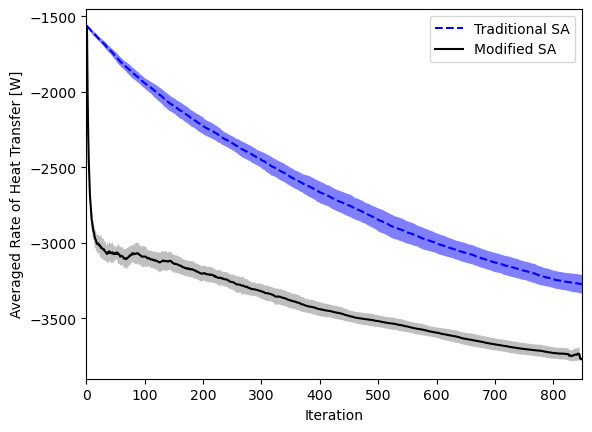

In [4]:
## Asymmetric Adapter ##

Full_R_TSA = []
Full_V_TSA= [] #volume
Full_A_TSA = [] #area
Full_S_TSA = [] #area
Full_D_TSA = [] #displacement
Full_R = []
Full_V= [] #volume
Full_A = [] #area
Full_S = [] #area
Full_D = [] #displacement
start = 0
end = 30
path = os.getcwd()+'Conf'
for j in range(start,end):
    path = os.getcwd()
    
    P = path+'\\Asymm50_4_%i'%j+'.txt'
#     print(P)
    if os.path.isfile(P):
#         print('In')
        data_R = np.loadtxt(path+'\\Asymm50_4_%i'%j+'.txt',usecols=0)
        data_V = np.loadtxt(path+'\\Asymm50_4_%i'%j+'.txt',usecols=1)
#         data_A = np.loadtxt(path+'\\Symm_%i'%j+'.txt',usecols=2)
        data_S = np.loadtxt(path+'\\Asymm50_4_%i'%j+'.txt',usecols=2)
        data_D = np.loadtxt(path+'\\Asymm50_4_%i'%j+'.txt',usecols=3)
        Full_R.append(data_R)
        Full_V.append(data_V)
        Full_S.append(data_S)
        Full_D.append(data_D)
for j in range(start,end):
    path = os.getcwd()
    
    P = path+'\\Asymm50_TSA_%i'%j+'.txt'
#     print(P)
    if os.path.isfile(P):
        data_R = np.loadtxt(path+'\\Asymm50_TSA_%i'%j+'.txt',usecols=0)
        data_V = np.loadtxt(path+'\\Asymm50_TSA_%i'%j+'.txt',usecols=1)
#         data_A = np.loadtxt(path+'\\Symm_%i'%j+'.txt',usecols=2)
        data_S = np.loadtxt(path+'\\Asymm50_TSA_%i'%j+'.txt',usecols=2)
        data_D = np.loadtxt(path+'\\Asymm50_TSA_%i'%j+'.txt',usecols=3)
        res = 850-len(data_R)
        if res > 0:
            last = np.repeat(data_R[-1],repeats = res)
            data_R = np.append(data_R,last)
        Full_R_TSA.append(data_R)
        Full_V_TSA.append(data_V)
        Full_S_TSA.append(data_S)
        Full_D_TSA.append(data_D)
print(len(Full_R_TSA))
def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    arr = np.ma.empty((np.max(lens),len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    var = arr.var(axis=-1)
    return arr.mean(axis = -1), arr.std(axis=-1),sqrt(var[-1])

T = 50
n = 150
limit = n/2
alpha = 0.5
figure1 = pyplot.figure()
y, error,std = tolerant_mean(Full_R)
yTSA, errorTSA,stdTSA = tolerant_mean(Full_R_TSA)

F_R = np.array(Full_R)
F_V = np.array(Full_V)
F_S = np.array(Full_S)
F_D = np.array(Full_D)

F_R_TSA = np.array(Full_R_TSA)
F_V_TSA = np.array(Full_V_TSA)
F_S_TSA = np.array(Full_S_TSA)
F_D_TSA = np.array(Full_D_TSA)
obj = []
vol = []
Str = []
dis = []

obj_TSA = []
vol_TSA = []
Str_TSA = []
dis_TSA = []
for i in range(len(F_R)):
    O = F_R[i][-1]
    V = F_V[i][-1]
    S = F_S[i][-1]
    D = F_D[i][-1]
    obj.append(O)
    vol.append(V)
    Str.append(S)
    dis.append(D)
M_obj = np.mean(obj)
S_obj = sqrt(np.var(obj))
M_vol = np.mean(vol)
S_vol = sqrt(np.var(vol))

M_str = np.mean(Str)
S_str = sqrt(np.var(Str))
M_dis = np.mean(dis)
S_dis = sqrt(np.var(dis))

for i in range(len(F_R_TSA)):
    O = F_R_TSA[i][-1]
    V = F_V_TSA[i][-1]
    S = F_S_TSA[i][-1]
    D = F_D_TSA[i][-1]
    obj_TSA.append(O)
    vol_TSA.append(V)
    Str_TSA.append(S)
    dis_TSA.append(D)
M_obj_TSA = np.mean(obj_TSA)
S_obj_TSA = sqrt(np.var(obj_TSA))
M_vol_TSA = np.mean(vol_TSA)
S_vol_TSA = sqrt(np.var(vol_TSA))
M_str_TSA = np.mean(Str_TSA)
S_str_TSA = sqrt(np.var(Str_TSA))
M_dis_TSA = np.mean(dis_TSA)
S_dis_TSA = sqrt(np.var(dis_TSA))


print('Objective',M_obj,' Average Standard Deviation',S_obj)

pyplot.plot(np.arange(len(yTSA))+1, yTSA, "b--",label = 'Traditional SA')
pyplot.fill_between(np.arange(len(yTSA))+1, yTSA-errorTSA, yTSA+errorTSA,
    alpha=0.5, edgecolor='none', facecolor='blue')

pyplot.plot(np.arange(len(y))+1, y, "k-",label = 'Modified SA')
pyplot.fill_between(np.arange(len(y))+1, y-error, y+error,
    alpha=0.5, edgecolor='none', facecolor='0.5')

pyplot.legend(fontsize = 'medium',markerscale = 1)

pyplot.xlabel('Iteration')
# pyplot.ylabel('Averaged Objective Function')
pyplot.ylabel("Averaged Rate of Heat Transfer [W]")
# pyplot.title('Temp: %i' %T + ' Alpha: %s' %alpha) #+' Mutations: %i' %n+' Limit: %s' %limit)


y, error,std = tolerant_mean(Full_V)
print('Volume',M_vol,' Average Standard Deviation',S_vol)
print('Volume TSA',M_vol_TSA,' Average Standard Deviation',S_vol_TSA)


y, error,std = tolerant_mean(Full_S)
print('Stress',M_str,' Average Standard Deviation',S_str)
print('Stress TSA',M_str_TSA,' Average Standard Deviation',S_str_TSA)

y, error,std = tolerant_mean(Full_D)
print('Displacement',M_dis,' Average Standard Deviation',S_dis)
print('Displacement TSA',M_dis_TSA,' Average Standard Deviation',S_dis_TSA)

pyplot.xlim([0,850])
